In [1]:
# pip install --upgrade librosa==0.10.2 soundfile 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename_angry='dataset/angry/0006_000352.wav'
filename_sad='dataset/suprised/0006_001409.wav'

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

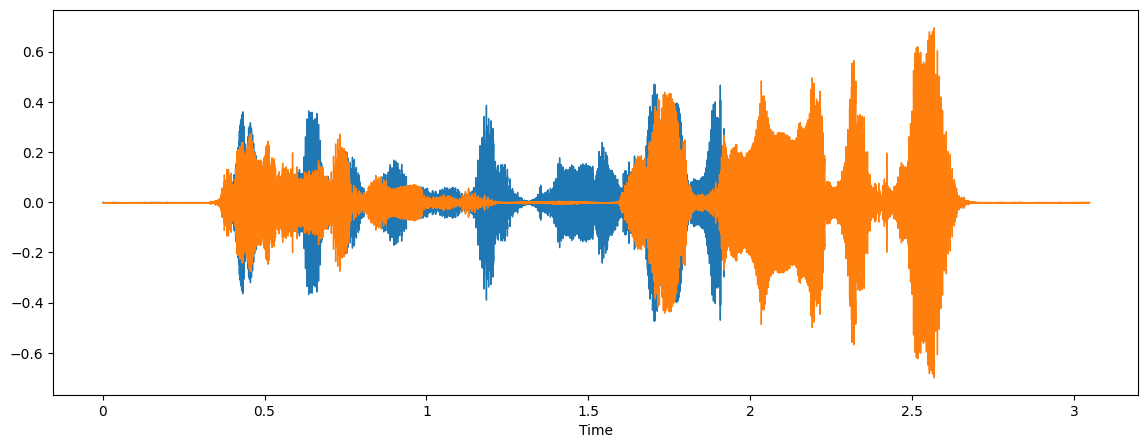

In [5]:
plt.figure(figsize=(14, 5))
librosa_audio_data_angry, librosa_sample_rate_angry = librosa.load(filename_angry)
librosa_audio_data_sad, librosa_sample_rate_sad = librosa.load(filename_sad)
# ipd.Audio(filename_angry)
librosa.display.waveshow(librosa_audio_data_angry, sr=librosa_sample_rate_angry)
librosa.display.waveshow(librosa_audio_data_sad, sr=librosa_sample_rate_sad)

In [8]:
# print(librosa_sample_rate_angry)
# print(librosa_sample_rate_sad)
print(librosa_audio_data_angry)
print(librosa_audio_data_sad)

[0.00103488 0.00116008 0.0010021  ... 0.00018281 0.0001336  0.        ]
[0.00034873 0.00044293 0.00040132 ... 0.00151973 0.00131127 0.        ]


In [9]:
## Extracting Fearures
mfccs = librosa.feature.mfcc(y=librosa_audio_data_angry, sr=librosa_sample_rate_angry, n_mfcc=40)
print(mfccs.shape)

(40, 102)


In [47]:
mfccs

array([[-577.3062   , -582.35     , -584.887    , ..., -585.93115  ,
        -585.61127  , -585.71857  ],
       [  15.40506  ,    8.477295 ,    4.836426 , ...,    3.4497895,
           3.9030256,    3.7511184],
       [  14.690564 ,    8.3598385,    4.608218 , ...,    3.4422698,
           3.897927 ,    3.7455807],
       ...,
       [   1.1126528,    2.4728055,    2.1636012, ...,    1.9706233,
           2.046893 ,    1.7664261],
       [   1.1451536,    2.4661524,    1.9763784, ...,    1.9273438,
           1.9687946,    1.6847485],
       [   1.1948438,    2.4599771,    1.8863082, ...,    1.8826882,
           1.8908103,    1.6033945]], dtype=float32)

In [48]:
# pip install soxr

In [1]:
import numpy as np

def feature_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_best')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=25)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [11]:
pathname_happy = 'dataset/happy/0006_000702.wav'
feature_extractor(pathname_happy)

array([-3.9651596e+02,  6.9475677e+01, -3.0008469e+01,  2.0295496e+01,
       -2.8535772e+01,  4.9779654e+00, -2.0995745e+01,  2.0169442e+00,
       -2.7222065e+01, -5.3809242e+00, -9.3590927e+00, -1.5106743e+01,
        1.5915842e+00, -1.2023591e+01,  8.2686901e+00, -8.9945555e+00,
       -9.1078920e+00, -6.3115349e+00,  3.6367815e+00,  6.8889540e-01,
        8.6621962e+00,  2.0305328e+00, -4.0034466e+00,  1.2861202e+01,
        2.3969285e+00,  4.6079121e+00,  8.4763181e-01,  6.1838216e-01,
       -4.6537418e+00, -1.3814549e-01,  6.0637110e-01,  1.8626637e+00,
        4.8543406e+00,  7.8459054e-01,  4.7969685e+00,  2.4101975e+00,
        4.6194205e+00,  2.4009938e+00,  9.2385778e+00,  3.9618449e+00],
      dtype=float32)

In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import librosa

# Assuming the dataset is structured as "dataset/<emotion_folder>/<audio_files>"
dataset_dir = 'small_dataset/'  # Root directory where the folders are located (e.g., 'angry', 'happy')

# Initialize an empty list to store extracted features and their corresponding labels (emotions)
extracted_features = []

# Traverse through each folder (which corresponds to the emotion category)
for emotion_folder in os.listdir(dataset_dir):
    emotion_path = os.path.join(dataset_dir, emotion_folder)

    # Ensure that it's a directory
    if os.path.isdir(emotion_path):
        print(f"Processing {emotion_folder}...")
        
        # Iterate over each audio file in the folder
        for audio_file in tqdm(os.listdir(emotion_path)):
            file_path = os.path.join(emotion_path, audio_file)
            
            # Check if the file is an actual audio file (e.g., .wav, .mp3)
            if file_path.endswith('.wav') or file_path.endswith('.mp3'):
                try:
                    # Extract MFCC features using the feature_extractor function
                    mfcc_features = feature_extractor(file_path)
                    
                    # Append the features and the emotion label (which is the folder name) to the list
                    extracted_features.append([mfcc_features, emotion_folder])
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

# Convert the list to a Pandas DataFrame for easier processing later
df = pd.DataFrame(extracted_features, columns=['features', 'label'])

# Optionally, save the DataFrame to a CSV for future use
df.to_csv('dataset_extracted_features.csv', index=False)

print("Feature extraction completed!")


Processing angry...


100%|██████████| 400/400 [01:06<00:00,  6.00it/s]


Processing disgust...


100%|██████████| 400/400 [00:53<00:00,  7.54it/s]


Processing fear...


100%|██████████| 400/400 [00:30<00:00, 13.13it/s]


Processing happy...


100%|██████████| 400/400 [00:34<00:00, 11.50it/s]


Processing neutral...


100%|██████████| 400/400 [00:36<00:00, 10.99it/s]


Processing pleasant_surprised...


100%|██████████| 400/400 [00:35<00:00, 11.40it/s]


Processing sad...


100%|██████████| 400/400 [00:42<00:00,  9.39it/s]


Feature extraction completed!


In [3]:
import pandas as pd
extracted_features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
print(extracted_features_df.shape)
extracted_features_df.head()

(2800, 2)


,features,class
0,"[-384.79733, 54.390743, -19.531075, -9.900465,...",angry
1,"[-445.87793, 67.17027, -4.443016, -18.495857, ...",angry
2,"[-403.93622, 28.718576, -7.4734845, 2.0294805,...",angry
3,"[-385.08487, 54.632744, -13.77236, -11.752619,...",angry
4,"[-399.7718, 53.635094, 1.6034607, 10.37927, 2....",angry


In [4]:
## split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['features'].tolist())
Y = np.array(extracted_features_df['class'].tolist())

Y

array(['angry', 'angry', 'angry', ..., 'sad', 'sad', 'sad'], dtype='<U18')

In [26]:
X.shape

(33250, 40)

In [5]:
## label encoding
# y=np.array(pd.get_dummies(Y))
# y.shape
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import joblib

labelencoder = LabelEncoder()
y=to_categorical(labelencoder.fit_transform(Y))
y

# Save the fitted LabelEncoder to a file
joblib.dump(labelencoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [6]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2240, 25)
(2240, 7)
(560, 25)
(560, 7)


In [11]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [10]:
num_labels = Y_train.shape[1]
num_labels

7

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model = Sequential()

# First layer
model.add(Dense(500, input_shape=(25,)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.4))

# Second layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.5))

# Third layer
model.add(Dense(500))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

# Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Compile the model with an appropriate optimizer
# optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Early stopping callback to monitor validation loss and stop if no improvement
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               20500     
                                                                 
 batch_normalization (Batch  (None, 500)               2000      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 500)               0         
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 1000)              501000    
                                                                 
 batch_normalization_1 (Bat  (None, 1000)              4000      
 chNormalization)                                       

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 40
num_batch_size = 512

checkpointer = ModelCheckpoint(filepath='save_models/audio_class.hdf5', verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test), callbacks=[early_stop])
duration = datetime.now() - start
print("Training time ", duration)


Epoch 1/40
5/5 [==============================] - 0s 72ms/step - loss: 0.0295 - accuracy: 0.9888 - val_loss: 0.0205 - val_accuracy: 0.9929
Epoch 2/40
5/5 [==============================] - 0s 53ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0204 - val_accuracy: 0.9929
Epoch 3/40
5/5 [==============================] - 0s 55ms/step - loss: 0.0285 - accuracy: 0.9893 - val_loss: 0.0199 - val_accuracy: 0.9929
Epoch 4/40
5/5 [==============================] - 0s 55ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0211 - val_accuracy: 0.9929
Epoch 5/40
5/5 [==============================] - 0s 51ms/step - loss: 0.0249 - accuracy: 0.9915 - val_loss: 0.0213 - val_accuracy: 0.9929
Epoch 6/40
5/5 [==============================] - 0s 53ms/step - loss: 0.0239 - accuracy: 0.9929 - val_loss: 0.0217 - val_accuracy: 0.9911
Epoch 7/40
5/5 [==============================] - 0s 52ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0190 - val_accuracy: 0.9946
Epoch 8/40
5/5 [===========

In [28]:
test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(test_accuracy[1])

model.save('small_tuned_model.h5')

0.9946428537368774


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [95]:
test_accuracy

[0.0057543739676475525, 0.9964285492897034]

In [26]:
import numpy as np
import librosa
from keras.models import load_model
import joblib

# Load the trained model
# model = load_model('tuned_model.h5')

# Load the fitted LabelEncoder
labelencoder = joblib.load('label_encoder.pkl')

# Load and extract MFCC features
test_pathname = 'Happy/0003_000704.wav'
audio, sample_rate = librosa.load(test_pathname)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=25)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape the features for prediction
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predict using the model
predicted_probabilities = model.predict(mfccs_scaled_features)
print(f"Predicted Probabilities: {predicted_probabilities}")

# Get the class index with the highest probability
predicted_label_index = np.argmax(predicted_probabilities, axis=1)
print(f"Predicted Class Index: {predicted_label_index}")

# Convert the predicted label index back to the actual class label
prediction_class = labelencoder.inverse_transform(predicted_label_index.tolist())
print(f"Predicted Emotion: {prediction_class[0]}")


1/1 [==============================] - 0s 46ms/step
Predicted Probabilities: [[4.9813613e-03 9.9287379e-01 1.1034340e-05 1.8243508e-03 6.4609679e-07
  1.1621748e-04 1.9256280e-04]]
Predicted Class Index: [1]
Predicted Emotion: disgust


In [27]:
## test dataset - predictions

from sklearn.metrics import classification_report, confusion_matrix

predicted_probabilities = model.predict(X_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(np.argmax(Y_test, axis=1), predicted_labels))

# Generate confusion matrix
confusion_mtx = confusion_matrix(np.argmax(Y_test, axis=1), predicted_labels)
print("Confusion Matrix:")
print(confusion_mtx)


18/18 [==============================] - 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        94
           2       0.99      1.00      0.99        81
           3       0.98      0.98      0.98        65
           4       1.00      1.00      1.00        71
           5       0.99      0.98      0.98        81
           6       1.00      1.00      1.00        90

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560

Confusion Matrix:
[[78  0  0  0  0  0  0]
 [ 0 94  0  0  0  0  0]
 [ 0  0 81  0  0  0  0]
 [ 0  0  0 64  0  1  0]
 [ 0  0  0  0 71  0  0]
 [ 0  0  1  1  0 79  0]
 [ 0  0  0  0  0  0 90]]


In [30]:
import numpy as np
import librosa
import sounddevice as sd
import time
from keras.models import load_model
import joblib

# Load your pre-trained model
model = load_model('small_tuned_model.h5')
labelencoder = joblib.load('label_encoder.pkl')

# Define parameters
duration = 2  # Duration in seconds for each prediction
sample_rate = 22050  # Sample rate for librosa
num_labels = 5  # Adjust according to your model
silence_threshold = 0.01  # Threshold for silence detection

# Function to extract features from audio data
def feature_extractor(audio_data, sr):
    mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=25)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

# Function to predict emotion from audio data
def predict_emotion(audio_data):
    # Check if the audio data is mostly silence
    if np.max(np.abs(audio_data)) < silence_threshold:
        print("Silence detected, skipping prediction.")
        return

    # Extract features
    prediction_feature = feature_extractor(audio_data.flatten(), sample_rate)
    prediction_feature = prediction_feature.reshape(1, -1)  # Reshape for the model

    # Make a prediction using the trained model
    predicted_probabilities = model.predict(prediction_feature)
    print(f"Predicted Probabilities: {predicted_probabilities}")

    # Get the class index with the highest probability
    predicted_label_index = np.argmax(predicted_probabilities, axis=1)
    print(f"Predicted Class Index: {predicted_label_index}")

    # Convert the predicted label index back to the actual class label
    prediction_class = labelencoder.inverse_transform(predicted_label_index)
    print(f"Predicted Emotion: {prediction_class[0]}")

# Function to continuously listen for audio input and classify emotions
def classify_audio():
    print("Starting audio classification...")
    while True:
        # Start recording audio in a non-blocking way
        audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
        sd.wait()  # Wait until recording is finished

        # Predict emotion from the recorded audio
        predict_emotion(audio_data)

        # Optional: Add a short delay between predictions
        time.sleep(0.5)  # Adjust as needed

# Start the classification process
classify_audio()


Starting audio classification...
1/1 [==============================] - 0s 176ms/step
Predicted Probabilities: [[8.92710924e-01 2.51627635e-10 4.83325812e-06 3.96278521e-09
  9.83417631e-05 1.07185856e-01 4.09163015e-08]]
Predicted Class Index: [0]
Predicted Emotion: angry
1/1 [==============================] - 0s 29ms/step
Predicted Probabilities: [[2.5693085e-02 2.9779125e-08 4.6315105e-05 1.2480012e-06 3.6757643e-05
  9.7421896e-01 3.5388657e-06]]
Predicted Class Index: [5]
Predicted Emotion: pleasant_surprised
1/1 [==============================] - 0s 39ms/step
Predicted Probabilities: [[2.0838996e-02 1.2805765e-05 1.0908042e-03 6.0188543e-04 1.7087595e-08
  9.7745514e-01 3.8600274e-07]]
Predicted Class Index: [5]
Predicted Emotion: pleasant_surprised
1/1 [==============================] - 0s 36ms/step
Predicted Probabilities: [[6.38288271e-04 2.26246066e-09 1.61566418e-02 1.17588985e-04
  2.41865661e-09 9.83087063e-01 4.58065102e-07]]
Predicted Class Index: [5]
Predicted Emotion: 

KeyboardInterrupt: 